# **Проект A/B-тестирования действий пользователей, связанных с внедрением улучшенной рекомендательной системы**

## План исследования 

Работать с данными будем в следующем порядке:
 - данные о датасете
 - подготовка данных
 - оценка коррекции проведения теста
 - исследовательский анализ данных
 - оценка результатов А/В теста
 - общий вывод исследования

## Цель исследования


Целью исследования являются:
- оценить корректность проведения теста
- проанализировать результаты теста

Ожидания от теста -  за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%: 
-	конверсии в просмотр карточек товаров — событие product_page,
-	просмотры корзины — product_cart,
-	покупки — purchase.


## Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`

## Описание данных

`ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год.

Структура файла:

- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

`final_ab_new_users.csv` — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

`final_ab_events.csv` — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

`final_ab_participants.csv` — таблица участников тестов.

Структура файла:

- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.

## Подготовка данных

In [ ]:
# перед началом работы импортируем библиотеки, которые могут понадобиться в работе над проектом

import pandas as pd

import math

import numpy as np

from matplotlib import pyplot as plt

from scipy import stats as st

import seaborn as sns

import scipy.stats as stats

import plotly.express as px

import plotly.graph_objs as go

from plotly.subplots import make_subplots

import requests 

from urllib.parse import urlencode 

import re

from calendar import day_name

%matplotlib inline

In [ ]:
# откроем файлы
# используя конструкцию try-ecxept для возможности открыть локально и с внешнего источника
try:
    mark_events = pd.read_csv(
        r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Выпускной проект\А-В тест\ab_project_marketing_events.csv', sep=',')
    ab_events = pd.read_csv(
        r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Выпускной проект\А-В тест\final_ab_events.csv', sep=',')
    new_users = pd.read_csv(
        r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Выпускной проект\А-В тест\final_ab_new_users.csv', sep=',')
    participants = pd.read_csv(
        r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Выпускной проект\А-В тест\final_ab_participants.csv', sep=',')
except:

    # используем api
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = 'https://disk.yandex.ru/d/gJQQR1lCJ3pAkg'
    # получаем url
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    # загружаем файл в df
    download_response = requests.get(download_url)
    mark_events = pd.read_csv(download_url)
    
    public_key = 'https://disk.yandex.ru/d/py_jSsn_0NbOlg'
    # получаем url
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    # загружаем файл в df
    download_response = requests.get(download_url)
    ab_events = pd.read_csv(download_url)
    
    public_key = 'https://disk.yandex.ru/d/j31YNvragOty9A'
    # получаем url
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    # загружаем файл в df
    download_response = requests.get(download_url)
    new_users = pd.read_csv(download_url)
    
    public_key = 'https://disk.yandex.ru/d/F-Xyn02AhX3T1w'
    # получаем url
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    # загружаем файл в df
    download_response = requests.get(download_url)
    participants = pd.read_csv(download_url)

# увеличим ширину колонки, что бы иметь возможность видеть все наименование продукта полностью
pd.options.display.max_colwidth = 150

Посмотрим на каждый из датасетов.

In [ ]:
# веведем часть дф и информацию о нем
display(mark_events.head())
mark_events.info()

В датафрейме необходимо сделать следующие преобразования:
- значения в столбцах имени  привести к строчным буквам
- название региона пока оставим без изменений
- значения в столбцах начала и окончания кампании привести в формат даты

In [ ]:
mark_events['finish_dt'] = pd.to_datetime(mark_events['finish_dt'])
mark_events['start_dt'] = pd.to_datetime(mark_events['start_dt'])

In [ ]:
# проверим наличие пропусков
mark_events.isna().sum()

In [ ]:
# и проверим наличие дубликатов
mark_events.duplicated().sum()

Дубликатов и пропусков в этом датафрейме не обнаружено

In [ ]:
# веведем часть дф и информацию о нем
display(ab_events.head())
ab_events.info()

В датафрейме евентов необходимо только привести столбец даты события в формат даты

In [ ]:
ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])

In [ ]:
ab_events.isna().sum()

Видим большое количество пропусков в столбце details. Посмотрим более детально на то, где есть пропуски.

In [ ]:
# применим логическую индексацию по пропускам в столбце
ab_events[ab_events['details'].isna()]

In [ ]:
# сгруппируем дф по событию и посчитаем среднее значение столбца деталей
ab_events.groupby('event_name')['details'].mean()

Видим, что отсутствуют значения, соответствующие событиям не связанным с покупкой, это вход, открытие страницы продукта или списка продуктов.

Заменим отсутствующие значения на нули

In [ ]:
ab_events['details'] = ab_events['details'].fillna(0)
ab_events.isna().sum()

In [ ]:
mark_events.duplicated().sum()

Пропуски и дубликаты в датафрейме событий отсутствуют.

In [ ]:
# веведем часть дф и информацию о нем
display(new_users.head())
new_users.info()

Столбец даты регистрации необходимо привести к формату даты, для столбцов региона и устройства проверить, какие там есть значения и не требуют ли они преобразования

In [ ]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

In [ ]:
# посмотрим на то, какие регионы есть в дф и сколько
new_users['region'].value_counts()

In [ ]:
# посмотрим на то, какие устройства фигурируют в дф и сколько
new_users['device'].value_counts()

В этих столбцах значения не будем приводить к строчным буквам.

In [ ]:
ab_events.isna().sum()

In [ ]:
mark_events.duplicated().sum()

Пропусков и дубликатов в датафрейме нет.

In [ ]:
# веведем часть дф и информацию о нем
display(participants.head())
participants.info()

In [ ]:
participants['group'].value_counts()

In [ ]:
participants['ab_test'].value_counts()

In [ ]:
participants.isna().sum()

In [ ]:
participants.duplicated().sum()

В рамках предобработки датафреймов:
- во всех столбцах, где это было необходимо, изменили данные о датах на корректный формат. 
- проверили наличие пропусков и в датафрейме событий заменили пропуски нулями
- убедились в отсутствии дубликатов
- проверили, что бы значения в столбцах региона, устройства пользователя, группы теста не содержали неявных дубликатов

Данные подготовлены для дальнейшего анализа.

# **Проверка данных на соответствие техническим условиям** 

## Изучение и проверка логов событий

Посмотрим более детально на данные по событиям, а именно проверим:
- сколько событий есть в данных
- сколько уникальных пользователей есть в данных
- сколько событий они совершают

In [ ]:
# посчитаем общее количество событий в дф
ab_events['event_name'].count()

In [ ]:
# посчитаем количество уникальных пользователей
ab_events['user_id'].nunique()

In [ ]:
# сформируем таблицу с количеством событий на одного пользователя
aver_event = ab_events.groupby('user_id')['event_name'].count().reset_index()
# и выведем информацию по  событиям
aver_event['event_name'].describe()

В данных есть информация о 440 тыс событий и 58,8 тыс уникальных пользователей. Среднее количество событий на одного пользователя 7,5, минимальное 1, максимальное 36

In [ ]:
# построим диаграмму размаха для данных о количестве действий
fig = px.box(aver_event, x = 'event_name' )
fig.update_layout(xaxis_title="Количество событий на одного пользователя",
                  height=300,  # установим размер графика
                  width=700)
fig.show()

In [ ]:
# посчитаем персентили по количеству заказов
print(np.percentile(aver_event['event_name'], [90, 95, 99])) 

Менее одного процента пользователей делали более 20 операций. Посмотрим для примера на действия того, у кого больше всего операций в приложении.

In [ ]:
# получим номер устройства клиента с максимальным количеством действий
aver_event.loc[aver_event['event_name'].idxmax()]

In [ ]:
# выделим в отдельный датафрейм действия пользователя с максимальным количеством действий
max_event = ab_events.query('user_id == "A3917F81482141F2"')
# и посмотрим, как они были распределены во времени

fig = px.histogram(max_event, x='event_dt',  title='Гистограмма кол-ва событий по датам')

fig.update_layout(yaxis_title="Количество событий",
                  xaxis_title="Дата",
                  height=400,  # установим размер графика
                  width=800)

fig.show()

Хотя пользователи, совершившие более 20 событий превышают 99 перцентиль, количество таких пользователей относительно общего их количества крайне мало, и анализ их поведения во времени показывает, что они совершали действия в течении длительного, около 30 дней, периода. Также стоит учесть, что одна из оцениваемых метрик это конверсия, на которую пользователи с большим количеством действий не повлияют,  считать таких пользователей аномальными не буду и оставлю в датафрейме.

In [ ]:
# проверим минимальную и максимальные даты совершения событий в данных
print('Дата самого раннего события', ab_events['event_dt'].min())
print('Дата самого позднего события', ab_events['event_dt'].max())


In [ ]:
# проверим распределение событий по дням на гистограмме
fig = px.histogram(ab_events, x='event_dt',  title='Гистограмма кол-ва событий по датам')

fig.update_layout(yaxis_title="Количество событий",
                  xaxis_title="Дата",
                  height=500,  # установим размер графика
                  width=900)

fig.show()

По техническим  условиям теста
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21
- остановка теста 2021-01-04
- ожидаемый эффект должен проявляться в течении 14 дней после регистрации


На гистограмме и по максимальной дате в датафрейме мы видим, что после 29-го декабря событый в логе практически нет, кроме единичных действий 30 декабря. Видимо тест был прерван раньше, либо история событий не была сохранена, или она не была передана нам. 

Мы не знаем причину отсутствия данных, но так как наша задача - сравнить относительные показатели между группами, на которые отсутствие информации повлияет одинаково, пока просто примем это во внимание.

В списке совершенных действий необходимо оставить только те, которые произошли в течении 14 дней после регистрации.


In [ ]:
# присоединим колонку first_date из дф новых пользователей методом inner
# что бы в дф остались только те пользователи, которые есть в обоих дф
# таким образом останутся только пользователи из EU и с датой регистрации до 16-го декабря
ab_events = ab_events.merge(new_users[['user_id', 'first_date']], on = 'user_id', how = 'inner')

In [ ]:
# посчитаем время от момента регистрации до времени совершения события
ab_events['life_time'] = ab_events['event_dt'] - ab_events['first_date']
# приведем его к целому дню
ab_events['life_time'] = ab_events['life_time'].astype('timedelta64[D]')
ab_events.head()

In [ ]:
# и удалим из дф данные о событиях, которые произошли после 14 дней после регистрации
ab_events = ab_events.query('life_time < 15')

Таким образом в данный момент в датафрейме событий остались только те действия, которые совершались в течении 14 дней после регистрации.

In [ ]:
# проверим распределение событий по дням на гистограмме в обновленном датафрейме
fig = px.histogram(ab_events, x='event_dt',  title='Гистограмма кол-ва событий по датам')

fig.update_layout(yaxis_title="Количество событий",
                  xaxis_title="Дата",
                  height=500,  # установим размер графика
                  width=900)

fig.show()

На графике видим большее, чем до обработки, падение количества действий после 24-го декабря, что связано с удалением действий, совершенный ранее зарегистрированными клиентами после 14 дней после регистрации.

## Проверка пересечения теста с другими активностями

In [ ]:
# выведем проведенные рекламные компании
mark_events

Видим, что кампания рождественского и новогоднего промо началась тогда, когда шел АВ тест. Набор новых пользователей в этот момент уже не проводился,  стартовавшее промо должно было повлиять на обе группы теста одинаково, поэтому до появления дополнительных данных не будем сокращать рассматриваемый период и клиентов.


## Проверка корректности распределения клиентов по группам

In [ ]:
participants

Название нашего теста - recommender_system_test. Посмотрим, данные о скольки тестах есть в данных и сколько в них участников.

In [ ]:
participants.groupby('ab_test')['group'].count()

In [ ]:
participants.groupby(['ab_test', 'group'])['user_id'].count()

Видим 6701 участник нашего теста и 11567 какого-то другого теста.  Распределение в нашем тесте неравномерное между группами, группа В меньше группы А. Проверим, нет ли пересечений по участию в тестах или участников, которые попали в обе группы.

In [ ]:
# для этого сгруппируем данные по пользователю, посчитаем сколько раз он принимал участие в тестах
# и сразу оставим только тех, кто есть в данных более двух раз
participants_wrong = participants.groupby('user_id')['ab_test'].count().reset_index().query('ab_test > 1')
participants_wrong.info()

У нас выявились 1602 участника, которые принимали участие в двух тестах одновременно. Мы не знаем, в чем была суть теста interface_eu_test и могло ли участие в нем повлиять на метрики нашего теста, перед принятием решения проверим, какое количество пользователей из группы Б второго теста были участниками групп А и В нашего теста.

In [ ]:
# веделим в однельный датафрейм пользователей из группы А нашего теста
participants_A_test = participants.query('group == "A" and ab_test == "recommender_system_test"')

# веделим в однельный датафрейм пользователей из группы В нашего теста
participants_B_test = participants.query('group == "B" and ab_test == "recommender_system_test"')

# выделим в отдельный дф пользователей группы В второго теста
participants_B_wrong_test = participants.query('group == "B" and ab_test == "interface_eu_test"')

In [ ]:
# присоединим к участникам группы А нашего теста их участие в группе В второго теста
participants_A_test = participants_A_test.merge(participants_B_wrong_test[['user_id', 'ab_test']], on = 'user_id', how = 'left')
# и посчитаем, сколько участников принимало участие во втором тесте
participants_A_test.groupby('group')[['ab_test_x', 'ab_test_y' ]].count()

439 участников группы А принимало участие в группе В второго теста, это 11,4%

In [ ]:
participants_B_test = participants_B_test.merge(participants_B_wrong_test[['user_id', 'ab_test']], on = 'user_id', how = 'left')
participants_B_test.groupby('group')[['ab_test_x', 'ab_test_y' ]].count()

344 участника группы В нашего теста принимали участие во втором тесте в группе В, это 11,9%.

Так как доли участников второго теста одинаковы в обеих группах нашего теста, мы можем сделать вывод, что второй тест влиял на  результаты участников в равной степени и не должен сказаться на итоговых результатах нашего теста.

Таким образом решение - оставить всех участников нашего теста, 6701 человека.

In [ ]:
# удалим участников второго теста из дф участников
participants = participants.query('ab_test == "recommender_system_test"')
participants.info()

## Проверка, все ли пользователи совершали действия

Для такой проверки посчитаем, сколько действий совершил каждый пользователь и присоединим эти данные к списку пользователей теста

In [ ]:
# сгруппируем количество событий по пользователю
user_event_grouped = ab_events.groupby('user_id')['event_name'].count().reset_index()
# сформируем дф с количеством событий на каждого пользователя - участника теста
test_user_events = participants.merge(user_event_grouped, on = 'user_id', how = 'left')
# заполним пропуски нулями, для тех кто не совершил ни одного действия
test_user_events['event_name'] = test_user_events['event_name'].fillna(0)
test_user_events.head()

In [ ]:
# отобразим активность пользователей на гистограмме
fig = go.Figure(data=[go.Histogram(x=test_user_events['event_name'])])
fig.update_layout(
    title="Гистограмма количества действий пользователей",
    title_x = 0.5,
    xaxis_title="Количество действий",
    yaxis_title="Количество пользователей")
fig.show()

Видим 3026 пользователей, которые не совершили ни одного действия, кроме собственно регистрации. Посмотрим, как эти пользователе распределены между группами.

In [ ]:
test_user_events.query('group == "A" and event_name == 0').shape[0]

In [ ]:
test_user_events.query('group == "B" and event_name == 0').shape[0]

В группе А 1077 пользователей из 3824 (28%) не совершали никаких действий после регистрации. В группе В 1949 из 2877 (67%) не совершали никаких действий. Такое различие в неактивных пользователях будет заранее определять различие в долях пользователей на каждом этапе воронки в тестовой и контрольной группах, поэтому удалим таких пользователей из дальнейшего рассмотрения.

In [ ]:
# удалим из датафрейма всех, у кого собития = 0
test_user_events = test_user_events.query('event_name > 0')
# и посмотрим, сколько осталось пользователей в группах
test_user_events.groupby('group')['user_id'].count()

Группа В после удаления пользователей без действий стала в три раза меньше группы А. Также общее количество участников теста стало 3675, что значительно меньше требуемого условиями теста количества 6000 человек.

## Проверка доли пользователей требуемого региона

По условиям теста участники должны составлять 15% от всех новых пользователей из Европы.

In [ ]:
# посчитаем количество новых пользователей по регионам
new_users.groupby('region')['user_id'].count()

В регионе EU  зарегисрировалось 46 270 новых пользователей. 15% от этого числа это 6 940 человек. В начальной выборке теста было 6701 пользователь, но в текущей, после удаления пользователей, не совершавших действия, осталось 3675 человек, что составляет 8% от всех новых пользователей. Это не удовлетворяет условиям теста, но мы продолжим исследование и учтем это в выводах.

## Выводы по итогам проверки данных

В рамках проверки данные на соответствие условиям теста выяснили следующие факты:
- в логах содержится информация только до 30.12.2020, в то время как по условиям теста он должен был продолжаться до 4-го января
- количество пользователей в группах неодинаковое
- тест пересекался с рекламной кампанией, предполагается что кампания оказала равное влияние на участников обеих групп
- некоторые участники теста принимали участие в другом тесте. Анализ доли участников показал, что участников нашего теста второй тест затронул равномерно в обеих группах, и мы не стали удалять таких участников
- ряд пользователей не совершал после регистрации никаких действий, причем доля таких пользователей в группе В значительно больше, чем в группе А, и такое различие повлияло бы на результаты теста, поэтому таких пользователей удалили из дальнейшего рассмотрения
- после этого удаления общее  количество участников теста стало значительно меньше условий, и распределение между группами стало еще более неравномерным

Однако продолжим исследование и позже оценим мощность теста с помощью стороннего ресурса.

# Исследовательский анализ данных

## Количество событий на пользователя

In [ ]:
# посмотрим сколько в среднем событий приходится на одного пользователя в каждой группе
test_user_events.groupby('group')['event_name'].mean().reset_index()

В группе А на одного пользователя приходится в среднем 6,8 действий, в группе В 5,5

## Распределение событий в выборках по дням

In [ ]:
# уберем из файла событий ненужный уже лайфтайм и дату первой регистрации
ab_events = ab_events.drop(['first_date', 'life_time'], axis=1)

In [ ]:
# добавим группу участника теста к данным о его действиях
ab_events = ab_events.merge(test_user_events[['user_id', 'group']], on = 'user_id')
ab_events

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ab_events.query('group == "A"')['event_dt'], name='Группа А'))
fig.add_trace(go.Histogram(x=ab_events.query('group == "B"')['event_dt'], name='Группа В'))
fig.update_layout(
    title="Распределение событий по времени в группах А и В",
    title_x = 0.5,
    xaxis_title="Дата",
    yaxis_title="Количество событий",
    legend=dict(x=.5, xanchor="center", orientation="v"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

С первых дней теста и до 13-го декабря количество событий в каждой из групп сопоставимо друг с другом, начиная с 14-го декабря количество событий в группе А значительно растет, тогда как в группе В оно остается на примерно том же уровне, что и ранее. Ранее мы видели, что в группе А значительно больше пользователей, и теперь мы видим когда начало проявляться это изменение.

## Динамика конверсии по воронке

Сначала посмотрим на общую воронку для обеих групп

In [ ]:
# сгруппируем события по их наименованию и посчитаем как часто они встречаются
grouped_events = ab_events.groupby('event_name')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False) # отсортируем по убыванию частоты
grouped_events

Чаще встрего встречается событие входа, потом отображение страницы продукта. Событие покупки встречается чаще, чем просмотр корзины. Это может быть связано с тем, что у клиента есть возможность приобретать продукт не добавляя его в корзину.

Посчитаем, сколько пользователей совершали каждое из этих событий, и долю пользователей, которые хоть раз совершали событие

In [ ]:
# создадим датафрейм с количеством каждого события, вычислив его по количеству уникальных пользователей
events_share = ab_events.groupby('event_name')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)
# переименуем столбцы
events_share.columns = ['event_name', 'events_quantity']
# посчитаем долю пользователей, хоть раз совершивших событие
# для этого разделим количество событий уникальных пользователей на общее количество уникальных пользователей
events_share['events_share'] = round(events_share['events_quantity']/ab_events['user_id'].nunique()*100, 1)
events_share

100% пользователей осуществляет вход, 62,7% заходят на страницу товара, 30,7 совершают покупку и 29,4 заходят в корзину. Это подтверждает предположение о том, что можно совершить покупку минуя заход в корзину.

Сформируем данные по событиям в каждой группе.

In [ ]:
# сгруппируем события по группе, посчитаем количество уникальных пользователей на каждом этапе
grouped_events_by_group = ab_events.pivot_table(
    index='group', columns='event_name', values='user_id', aggfunc='nunique')
grouped_events_by_group

In [ ]:
# для удобства дальнейшей работы транспонируем эту таблицу
grouped_events_by_group_t = grouped_events_by_group.T.reset_index()

In [ ]:
# и переименуем столбцы
grouped_events_by_group_t.columns = ['event_name', 'group_A', 'group_B']
grouped_events_by_group_t.reset_index()
grouped_events_by_group_t

In [ ]:
# изменим последовательность строк в соответствии с воронкой действий
grouped_events_by_group_t = grouped_events_by_group_t.loc[[0, 2, 1, 3]]
grouped_events_by_group_t

In [ ]:
# отобразим воронку конверсии для групп на графике
fig = go.Figure()
for i in ['group_A', 'group_B']:
    fig.add_trace(go.Funnel(
        name = str(i),
        y = grouped_events_by_group_t['event_name'],
        x = grouped_events_by_group_t[i],
        textposition = "inside",
        textinfo = "value+percent initial+percent previous")
                 )
    fig.update_layout(
    title_text='Воронка событий для исследуемых групп',
    title_x=0.5,
    # установим размер графика    
    height=500,  
    width=1100,
    legend=dict(x=.5, xanchor="center", orientation="h")
    )
fig.show()

Воронка событий для рассматриваемых групп показывает:
- как мы видели ранее размеры групп разные, группа А значительно больше
- ожидаемого улучшения метрик конверсии не поизошло, на всех этапах она в группе В хуже, чем в группе А

# Статистическая значимость разницы

От проводимого теста ожидали следующий эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%: 
-	конверсии в просмотр карточек товаров — событие product_page,
-	просмотры корзины — product_cart,
-	покупки — purchase.


Сформулируем нулевую гипотезу, которую будем проверять. Статистически значимых отличий в конверсии пользователей на каждом этапе  взаимодействия  - НЕТ. Альтернативная гипотеза - статистически значимые различия в конверсии есть.

Для проверки будем использовать z-тест для пропорций, который подходит для сравнения конверсий в двух группах, понимая под конверсией отношение количества пользователей на каждом событии к общему количеству пользователей.

In [ ]:
# импортируем необходимый статистический тест
from statsmodels.stats.proportion import proportions_ztest
from termcolor import colored

# зададим уровень статистической значимости
alpha = 0.05

# напишем цикл перебора индексов в таблице groups_conv_t
# для проверки статистической разницы для каждого этапа
for i in [2, 1, 3]:

    # в переменную count запишем данные по количеству пользователей на каждом этапе
    count = np.array([grouped_events_by_group_t.loc[i, 'group_A'],
                     grouped_events_by_group_t.loc[i, 'group_B']])
    # в перем nobs запишем общее количество членов группы
    nobs = np.array([grouped_events_by_group_t.loc[0, 'group_A'],
                    grouped_events_by_group_t.loc[0, 'group_B']])

    stat, pval = proportions_ztest(count, nobs)  # запустим z-тест

    print('p-значение для:',
          grouped_events_by_group_t.loc[i, 'event_name'], '{0:0.5f}'.format(pval))

    if pval < alpha:
        print(colored(
            f"Отвергаем нулевую гипотезу, конверсия в  {grouped_events_by_group_t.loc[i,'event_name']} в группах разные \n", 'red'))
    else:
        print(colored(
            f"Не получилось отвергнуть нулевую гипотезу, конверсия в {grouped_events_by_group_t.loc[i,'event_name']} в группах  одинаковые \n", 'green'))

По результатам оценки статистической значимости различий z-тест показал таковую для конверсии в переход на страницу товара и для конверсии в покупку, при этом из анализа воронки действий мы знаем, что для группы В эта конверсия ниже, чем для группы А, то есть показатели ухудшились. 

Перед тем как делать выводы оценим мощность теста

# **Оценка мощности теста**

С помощью сервиса abtestguide оценим исходные данные и результаты нашего теста. Ознакомиться с результатами можно по ссылке 
https://abtestguide.com/calc/?ua=2747&ub=927&ca=872&cb=265 

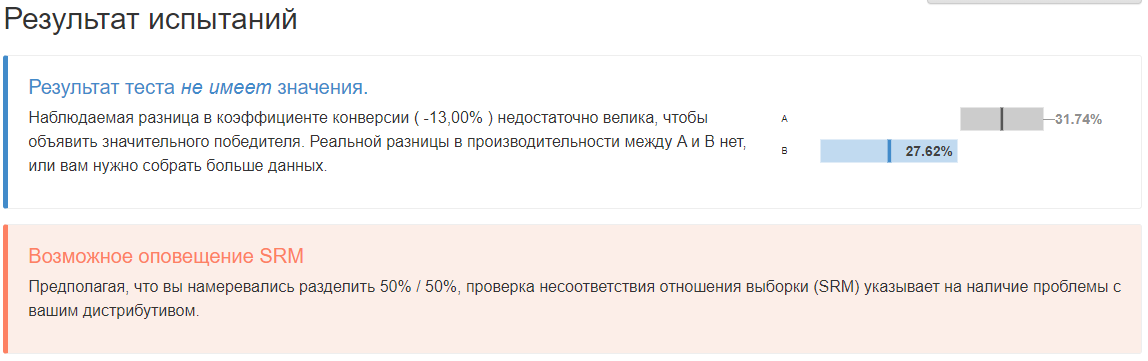

Сервис сообщает нам, что результаты не имеют значения, нам нужно собрать больше данных, а также указывает нам на то, что выборки в группах А и В разные по размеру.

# **Общий вывод исследования**

Главный вывод исследования - на основании имеющихся данных принимать решение нельзя. 

Группа пользователей В показывает худшие результаты конверсии в покупку, по сравнению с группой А, но с учетом выявленных особенностей данных, а именно:
- сбор данных прекращен ранее даты окончания теста
- группы А и В = неодинаковы по размеру, группа А была больше
- в данных по группам А и В была информация о пользователях, не совершивших никаких действий (28 и 67% соответственно)
- удаление таких пользователей привело к еще большей разнице в размере групп
вероятно эти результаты некорректны.

Рекомендация - тест прекратить, вариант измененной рекомендательной системы пока отключить. Провести проверку системы распределения пользователей по группам, и после ее настройки провести тест повторно.